### Explanation For The Micro-Price Strategy And 
### An Attempt At Implementing The Strategy On My 
### Own (without the IMC Prosperity competition being involved)
### Will Be At The Top And An Attempt At Implementing
### For The IMC Prosperity Challenge Will Be In The Middle And
### An Attempt To Implement The Strategy On My Own May
### Be At The Bottom

##### Note: When you see commments with regular casing and/or spelling that should probably indicate that
##### those comments belong to the Author of the original Jupyter Notebook that I may have attempted to learn this from
##### In An Attempt To Reduce Confusion I Will Attempt To Leave Every Comment I Make In An <font face = Oswald>**Oswald**</font> Font 

##### And In The Color Of <font color="orange">Orange</font> / <font color="brown">Brown</font> / <font color="purple">Purple</font> / Etcetera So That You May Be Able To Tell Which Is Mine And Which Belongs To The Author Of The Original Jupyter Notebook.

### Attribution: Where would I be without ChatGPT (I asked a fair amount of question(s) from the language model so to not provide a shoutout would be kind of rude and/or misleading)?

# The First Implementation Is Credited Towards Sasha Stoikov

###### Link To Orginal Jupyter Notebook (https://github.com/sstoikov/microprice/blob/master/Microprice%20-%20Big%20Data%20Conference.ipynb)
###### Link To Orginal Paper (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2970694)
###### Also, Including A Link To A Talk At The IAQF Seminar On 2/14/23 (https://www.youtube.com/watch?v=S7eig5VXFpY)

# The Second Implementation Is Credited Towards 0xAlston and the team named MEV

###### Link To Original Jupyter Notebook (https://github.com/0xAlston/imc_prosperity_trading_bot/blob/main/eda/micro_price_implementation.ipynb)

# The Third Implementation's Data Is Credited Toward's Yahoo Finance


<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

**<center>Just adding some space for the first implementation</center>**

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>


# The microprice

An estimator of the fair price, given the state of the order book

Video introduction to motivate the microprice:
https://www.youtube.com/watch?v=0ZHypIAxYNo

KISS

You can download the paper here:

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2970694

# Big question:

What is the fair price, given the bid/ask prices and sizes?

We will call this notion of fair price the microprice.

This notion can be useful to algorithmic traders, HFT, market makers, etc...

# Definitions

The bid, ask, bid size, ask size: $P^b, P^a, Q^b, Q^a$

<center><b><font face="Oswald" color="orange"> Bid Price: </font></b></center>
<div>&nbsp;</div>
<center><font face="Oswald">Represented as $P^b$ and it, typically, displays the highest price that a buyer is willing to pay for a security at a point in time. </font></center>
<div>&nbsp;</div>
<center><b><font face="Oswald" color="orange"> Ask Price: </font></b></center>
<div>&nbsp;</div>
<center><font face="Oswald">Represented as $p^a$ and it, typically displays the lowest price that a seller is willing to accept for a security at a point in time</font></center>
<div>&nbsp;</div>
<center><b><font face="Oswald" color="orange"> Bid Size: </font></b></center>
<div>&nbsp;</div>
<center><font face="Oswald">Represented as $Q^b$ and it, typically displays the security quantity that buyers are willing to purchase at the bid price</font></center>
<div>&nbsp;</div>
<center><b><font face="Oswald" color="orange"> Ask Size: </font></b></center>
<div>&nbsp;</div>
<center><font face="Oswald">Represented as $Q^a$ and it, typically displays the security quantity that sellers are willing to sell at the ask price</font></center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<center><b>The mid-price:</b></center>
<div>&nbsp;</div>
<center>$$M=\frac{P^b+P^a}{2}$$</center>
<font face="Oswald">The mid-price is (represented as $M$) calculated by averaging the bid and ask prices. It is commonly used to measure the fair value of a security and it's a representation of the price that is halfway between the highest price a buyer is willing to pay and the lowest price a seller is willing to accept. It may be used as a benchmark for determining whether a particular transaction is good or bad (price wise). The prices that are above the mid-price are, typically, considered to be expensive and the prices that are below the mid-price are, typically, considered to be inexpensive.</font>
<div>&nbsp;</div>
<center><font face="Oswald"><b>Demonstrated Example:</b> assuming $P^b$ = 2.01 and $P^a$ = 2.54</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M=\frac{2.01+2.54}{2}$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M=\frac{4.55}{2}$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M=2.275$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">Given the assumptions, the mid-price is 2.275</font></center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<center><b>The weighted mid-price:</b></center>
<div>&nbsp;</div>
<center>$$M=P^b (1-I) +P^a I$$</center>
<div>&nbsp;</div>
<font face="Oswald">The weighted mid-price (represented as $M$) calculates the mid-price as a weighted average factoring in the bid and the ask prices, with applied weights being determined by the imbalance factor (represented as $I$). It is a more nuanced way of calculating the mid-price to, also, factor in the supply and demand dynamics of a security</font>
<div>&nbsp;</div>
<center><font face="Oswald">The bid price is represented as $P^b$ and the ask price is represented as $P^a$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">The imbalance factor is represented as $I$ and is more of a measure of the supply and demand for a security and this ranges from -1 to +1 where -1 indicates there is only selling interest in the security and a value of +1 indicates that there is only buying interest. Also, a value of 0 would indicate a balanced market. So, if the imbalance factor is positive, this would suggest that the ask price receives a higher weight than the bid price, and that the weighted mid-price would be closer to the ask price. This would, also, mean that if the imbalance factor is negative, the bid price will receive a higher weight than the ask price, and that the weighted mid-price will be closer to the bid price.</font></center>
<div>&nbsp;</div>
<center><font face="Oswald"><b>Demonstrated Example:</b> assuming $P^b$ = 0.27 $P^a$ = 6.37 $I$ = 3.47</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M = 0.27 (1 - 3.47) + 6.37 (3.47)$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M = 0.27 (-2.47) + 22.0929$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$M = 21.4277$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald"> Given the assumptions, the weighted mid-price is 21.4277</font></center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<center><b>The imbalance:</b></center>
<div>&nbsp;</div>
<center>$$I=\frac{Q_b}{Q_b+Q_a}$$</center>
<div>&nbsp;</div>
<center><font face="Oswald"> In market making the imbalance (represented as $I$ - imbalance measure) is used to measure the difference between the buy and the sell orders for a particular security or asset. This equation represents an imbalance measure between buy and sell orders where $Q_b$ displays the quantity of shares that buyers desire to buy and $Q_a$ displays the quantity of shares that sellers want to sell. The imbalance measuer can take on values between 0 and 1. Values closer to 0 may indicate a higher concentration of sell orders and values closer to 1 may indicate a higher concentration of buy orders. When $Q_a$ and $Q_b$ are equal, $I$ is 0.5 and may indicate a balance between buy and sell. The imbalance measure is used by market makers to assess the demand and supply for a security and make decisions on whether their quotes should be adjusted with the measure. An example of this would be if the imbalance measure indicates a higher concentration of buy orders, the market maker may respond by adjusting their quote to sell the security at a higher price in an attempt to take advantage of a rise in demand. This may also mean that if the imbalance measure reveals a higher concentration of sell orders, then the market maker may respond by adjusting their quote to buy the security at a lower price in an attempt to take advantage of a rise in supply. The imbalance measure may be a useful tool for a market maker to manager their risk and/or optimize their trading strategies as they decide whether or not to respond to change in market conditions.</font></center>
<div>&nbsp;</div>
<center><font face="Oswald"><b>Demonstrated Example:</b> assuming $Q_b$ = 0.35 and $Q_a$ = 0.15</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$I=\frac{Q_b}{Q_b+Q_a}=\frac{0.35}{0.35+0.15}$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$I=\frac{0.35}{0.5}$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$I=0.7$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">Given the assumptions, $$I=0.7$$ and this may indicate a higher concentration of buy orders than sell orders, with buyers making up 70% of the total demand and sellers making up the remaining 30%</font></center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<center><b>The Bid Ask Spread</b></center>
<div>&nbsp;</div>
<center>$$S=(P^a-P^b)$$</center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<center><font face="Oswald"> The Bid Ask Spread is a representation of the difference between the highest price a buyer is willing to pay for a security (the bid price) and the lowest price a seller is will to accept for the same security (the ask price). The Bid Ask Spread may indicate the cost of executing a trade in the market and may be a significant measure of market liquidity. A wider spread may reveal lower liquidity as it may become more difficult to seek buyers and sellers that are willing to proceed with transactions at the same price. A narrower spread may reveal higher liquidity as it may become easier to seek buyers and sellers that are willing to proceed with transactions at the same price. Note: the bid-ask spread is influenced by a number of factors, including supply and demand, trading volume, and market volatility so, as a market maker, it may be important to monitor those factors and decide whether to adjust your quotes in an attempt to maintain a competitive spread and/or manage your risk</font></center>
<div>&nbsp;</div>
<center><font face="Oswald"> $P^a$ is the ask price | $P^b$ is the bid price | $S$ is the spread (difference between the ask and bid prices)</font></center>
<div>&nbsp;</div>
<center><font face="Oswald"><b>Demonstrated Example:</b> assuming $P^a$ = 4.35 and $P^b$ = 5.3</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$S = 4.35 - 5.3$$</font></center>
<div>&nbsp;</div>
<center><font face="Oswald">$$S = -0.95$$</font></center>
<center><font face="Oswald">$$S = -0.95$$</font></center>
<div>&nbsp;</div>
<div>&nbsp;</div>
<div><b>Note: @27:46 regarding the equation displayed in the Maximize exponential utility model. If I'm not mistaken, it could be said that -v(XT+qTST) is risker than if you had substituted 0 for qT at the end of the day [-v(XT+0ST)] and this may be due to the idea that anything could happen after the trading day closes and markets could heavily jump and/or fall after the trading day has closed so the model may have certain a counter-intutitive feature that the trader will be more risk averse at the beginning of the day and will be more willing to take on strange inventory positions at the end of the trading day.

In [23]:
# importing numpy library

import numpy as np

# importing pandas library

import pandas as pd

# Instructing matplotlib to render plot(s) as static image(s) directly in the notebook (without opening a separate window to display the 
# plot | possibly, allowing easier sharing of code and/or result(s))

# Note: This command is specific to Jupyter Notebook and JupyterLab. Matplotlib may use a different backend or require a different command to display
# plots inline - in other Python environments

%matplotlib inline

In [24]:
def get_df(ticker):
    file1='%s_20110301_20110331.csv'%str(ticker)
    df=pd.read_csv(file1)
    df.columns = ['date', 'time', 'bid', 'bs', 'ask', 'as']
    df = df.dropna()
    df['date']=df['date'].astype(float)
    df['time']=df['time'].astype(float)
    df['bid']=df['bid'].astype(float)
    df['ask']=df['ask'].astype(float)
    df['as']=df['as'].astype(float)
    df['mid']=(df['bid'].astype(float)+df['ask'].astype(float))/2
    df['imb']=df['bs'].astype(float)/(df['bs'].astype(float)+df['as'].astype(float))
    df['wmid']=df['ask'].astype(float)*df['imb']+df['bid'].astype(float)*(1-df['imb'])
    return df

In [25]:
data=get_df('BAC')[0:100]
data.head()

,date,time,bid,bs,ask,as,mid,imb,wmid
0,40603.0,34222.0,14.33,20,14.34,471.0,14.335,0.040733,14.330407
1,40603.0,34223.0,14.33,25,14.34,148.0,14.335,0.144509,14.331445
2,40603.0,34224.0,14.33,31,14.34,95.0,14.335,0.246032,14.332460
3,40603.0,34225.0,14.33,29,14.34,92.0,14.335,0.239669,14.332397
4,40603.0,34226.0,14.33,21,14.34,65.0,14.335,0.244186,14.332442


<Axes: >

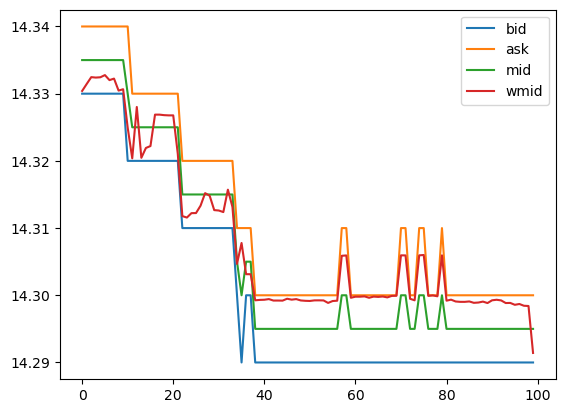

In [26]:
data[['bid', 'ask', 'mid', 'wmid']].plot()

# The mid vs. the weighted mid

<div>&nbsp;</div>

### The mid price:

<div>&nbsp;</div>

▢ Not a martingale (Bid-ask bounce)

<div>&nbsp;</div>

▢ Medium frequency signal

<div>&nbsp;</div>

▢ Doesn't use volume at what could, possibly, be the best bid and ask prices.

### The weighted mid-price:

<div>&nbsp;</div>

▢ Uses the volume at what could, possibly, be the best bid and ask prices.

<div>&nbsp;</div>

▢ High frequency signal

<div>&nbsp;</div>

▢ May be quite noisy, particularly when the spread widens to two ticks

<div>&nbsp;</div>


# Desirable features of the Micro-Price

<br>

$P_t^{micro}=F(M_t,I_t,S_t) = M_t + G(I_t,S_t)$

<div>&nbsp;</div>

▢ Martingale

<div>&nbsp;</div>

▢ Computationally fast

<div>&nbsp;</div>

▢ Possibly, better short term price predictions than the midprice or weighted midprice

<div>&nbsp;</div>

▢ May work for large tick stocks (like BAC) or small tick stocks (like CVX)

<div>&nbsp;</div>

# Outline

<div>&nbsp;</div>

<div>1| General definition</div>

<div>2| A discrete Markov model</div>

<div>3| Data analysis</div>

<div>4| Conclusion</div>

# Micro-price defintion

Define

<div>&nbsp;</div>

\begin{equation*}
P_t^{micro}=\lim_{n\to\infty} P_t^n
\end{equation*}

<div>&nbsp;</div>

where the approximating sequence of martingale is given by

<div>&nbsp;</div>

$$P^n_t=\mathbb{E} \left[ M_{\tau_n} | I_t,S_t \right]$$

<div>&nbsp;</div>

<b>$τ_1$</b> ,..., <b>$τ_n$</b> are (random) times when the mid-price <b>$M_t$</b> changes

<div>&nbsp;</div>

The micro-price is the expected mid-price in the distant future

<div>&nbsp;</div>

In practice, the distant future is well captured by $P_t^6$, the expected mid price after 6 price moves.

# Main result

<div>&nbsp;</div>

The $i$-th approximation to the micro-price can be written as

<div>&nbsp;</div>

\begin{equation*}
P_t^{n} = M_t + \sum_{k=1}^{n}g^kg(I_t,S_t)
\end{equation*}

<div>&nbsp;</div>

where

<div>&nbsp;</div>

$$g^1(I_t,S_t)) = \mathbb{E} \left[ M_{\tau_1} - M_t | I_t, S_t \right] $$

<div>&nbsp;</div>

and

<div>&nbsp;</div>

$$g^{n+1}(I_t,S_t) = \mathbb{E}\left[ g^n(I_{\tau_{1}},S_{\tau_{1}}) | I_{t},S_t\right], \forall j\geq 0$$

<div>&nbsp;</div>

can be computed recursively.

<div>&nbsp;</div>


# Finite state Markov chain

<div>&nbsp;</div>

▢ The imbalance takes discrete values $1\leq i_I \leq n$

<div>&nbsp;</div>

▢ The spread takes discrete values $1\leq i_S \leq m$

<div>&nbsp;</div>

▢ The mid-price changes takes values in $K =[ -0.01 \quad -0.005 \quad 0.005 \quad 0.01]$

<div>&nbsp;</div>

▢ Define the state $X_t=(I_t,S_t)$ with discrete values $1\leq i \leq nm$

<div>&nbsp;</div>

# Computing $g^1$

<div>&nbsp;</div>

The first step approximation to the micro-price

<div>&nbsp;</div>

\begin{align*}
g^1(i) = & \mathbb{E} \left[M_{\tau_{1}} - M_{t} | X_t = i \right] \\
= {}& \big(1-Q\big)^{-1}R^1\underline{k}
\end{align*}

<div>&nbsp;</div>

Where

<div>&nbsp;</div>

$$Q_{ij} := \mathbb{P}(M_{t+1} - M_t = 0 \wedge X_{t+1}=j | X_t = i)$$

<div>&nbsp;</div>

are the transition probabilities for transient states (mid price does not move)

<div>&nbsp;</div>

$$R^1_{ik} := \mathbb{P}(M_{t+1} - M_t = k | X_t = i)$$ are the transition probabilities into absorbing states (mid price does move)

<div>&nbsp;</div>

and $\underline{k} = [-0.01 \quad -0.005 \quad 0.005 \quad 0.01]^T$

<div>&nbsp;</div>



# Computing $g^{i+1}$

<div>&nbsp;</div>

We can compute recursively

<div>&nbsp;</div>

\begin{align*}
g^{n+1} = B g^n
\end{align*}

<div>&nbsp;</div>

where $B:=\big(1-Q\big)^{-1}R^2$

<div>&nbsp;</div>

and $R^2$ is a new matrix of absorbing states

<div>&nbsp;</div>

\begin{align*}
R^2_{ik} := {}& \mathbb{P}(M_{t+1} - M_t \neq 0 \wedge I_{t+1} = k | I_t = i)
\end{align*}

<div>&nbsp;</div>


# Does the micro-price converge?

<div>&nbsp;</div>

Yes. But it may be beneficial to appropriately symmetrize the data.

<div>&nbsp;</div>

Technical conditions are available in the paper.

<div>&nbsp;</div>


# Data analysis on BAC and CVX

# Estimation

<div>&nbsp;</div>

1| On every quote, compute $I_t, S_t, (M_{t+1} - M_t)$, after having discretized the state space

<div>&nbsp;</div>

2| Symmetrize the data, by making a copy where $I^2_t = n - I_t, S^2_t = S_t, (M^2_{t+1} - M^2_t) = -(M_{t+1}-M_t)$

<div>&nbsp;</div>

3| Estimate transition probability matrices $Q, R^1, R^2$

# Computation

<div>&nbsp;</div>

Compute the first micro-price adjustment:

<div>&nbsp;</div>

$$p^{1}-M = g^1 = \big(1-Q\big)^{-1}R^1\underline{k}$$

<div>&nbsp;</div>

Use our recursive formula to compute the 6th micro-price adjustment:

<div>&nbsp;</div>

$$p^{6}-M = g^1+g^2+ \ldots +g^6 = g^1 + B g^1 + \ldots + B^5 g^1 $$

<div>&nbsp;</div>

In practice this converges after 6 price moves

<div>&nbsp;</div>


In [27]:
from scipy.linalg import block_diag
import matplotlib.pyplot as plt

In [28]:
def prep_data_sym(T,n_imb,dt,n_spread):
    #↑↑ SO THIS FUNCTION FOR [insert] WILL TAKE IN T = [insert], n_imb = [insert], dt = [insert], and n_spread = [insert] 
    spread=T.ask-T.bid
    ticksize=np.round(min(spread.loc[spread>0])*100)/100
    T.spread=T.ask-T.bid
    # adds the spread and mid prices
    T['spread']=np.round((T['ask']-T['bid'])/ticksize)*ticksize
    T['mid']=(T['bid']+T['ask'])/2
    #filter out spreads >= n_spread
    T = T.loc[(T.spread <= n_spread*ticksize) & (T.spread>0)]
    T['imb']=T['bs']/(T['bs']+T['as'])
    #discretize imbalance into percentiles
    T['imb_bucket'] = pd.qcut(T['imb'], n_imb, labels=False)
    T['next_mid']=T['mid'].shift(-dt)
    #step ahead state variables
    T['next_spread']=T['spread'].shift(-dt)
    T['next_time']=T['time'].shift(-dt)
    T['next_imb_bucket']=T['imb_bucket'].shift(-dt)
    # step ahead change in price
    T['dM']=np.round((T['next_mid']-T['mid'])/ticksize*2)*ticksize/2
    T = T.loc[(T.dM <= ticksize*1.1) & (T.dM>=-ticksize*1.1)]
    # symetrize data
    T2 = T.copy(deep=True)
    T2['imb_bucket']=n_imb-1-T2['imb_bucket']
    T2['next_imb_bucket']=n_imb-1-T2['next_imb_bucket']
    T2['dM']=-T2['dM']
    T2['mid']=-T2['mid']
    T3=pd.concat([T,T2])
    T3.index = pd.RangeIndex(len(T3.index)) 
    return T3,ticksize

In [53]:
def estimate(T):
    no_move = T[T['dM'] == 0]
    no_move_counts = no_move.pivot_table(index = [ 'next_imb_bucket'], 
                                        columns = ['spread', 'imb_bucket'], 
                                        values = 'time', 
                                        fill_value = 0, 
                                        aggfunc = 'count').unstack()
    Q_counts = np.resize(np.array(no_move_counts[0:(n_imb*n_imb)]),(n_imb, n_imb))
    # Loop over all spreads and add block matrizes
    for i in range(1,n_spread):
        Qi = np.resize(np.array(no_move_counts[(i*n_imb*n_imb):(i+1)*(n_imb*n_imb)]), (n_imb,n_imb))
        Q_counts = block_diag(Q_counts,Qi)
    #Print Q_counts
    move_counts = T[(T['dM']!=0)].pivot_table(index=['dM'],
                                              columns=['spread', 'imb_bucket'],
                                              values='time',
                                              fill_value=0,
                                              aggfunc='count').unstack()
    
    R_counts=np.resize(np.array(move_counts),(n_imb*n_spread,4))
    T1=np.concatenate((Q_counts,R_counts),axis=1).astype(float)
    for i in range(0,n_imb*n_spread):
        T1[i]=T1[i]/T1[i].sum()
    Q=T1[:,0:(n_imb*n_spread)]
    R1=T1[:,(n_imb*n_spread):]
    
    K=np.array([-0.01, -0.005, 0.005, 0.01])
    move_counts=T[(T['dM']!=0)].pivot_table(index=['spread', 'imb_bucket'],
                        columns=['next_spread', 'next_imb_bucket'],
                        values='time',
                        fill_value=0,
                        aggfunc='count') #.unstack()
    
    R2_counts=np.resize(np.array(move_counts),(n_imb*n_spread,n_imb*n_spread))
    T2=np.concatenate((Q_counts,R2_counts),axis=1).astype(float)
    
    for i in range(0,n_imb*n_spread):
        T2[i]=T2[i]/T2[i].sum()
    R2=T2[:,(n_imb*n_spread):]
    Q2=T2[:,0:(n_imb*n_spread)]
    G1=np.dot(np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),R1),K)
    B=np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),R2)
    
    return G1,B,Q,Q2,R1,R2,K
                                               

In [57]:
def plot_Gstar(ticker,G1,B,T):
    G2=np.dot(B,G1)+G1
    G3=G2+np.dot(np.dot(B,B),G1)
    G4=G3+np.dot(np.dot(np.dot(B,B),B),G1)
    G5=G4+np.dot(np.dot(np.dot(np.dot(B,B),B),B),G1)
    G6=G5+np.dot(np.dot(np.dot(np.dot(np.dot(B,B),B),B),B),G1)
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb)*0,label='Mid adj', marker='o')
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb),label='Weighted mid adj',marker='o')
    for i in range(0,n_spread):
        plt.plot(imb,G6[(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick adj",marker='o')
    plt.ylim(-0.005,0.005)
    plt.legend(loc='upper left')
    plt.title(ticker+' adjustments')
    plt.xlabel('Imbalance')
    return G6

# BAC

In [58]:
n_imb=10
n_spread=2
dt=1
data=get_df('BAC')
ticker='BAC'
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)

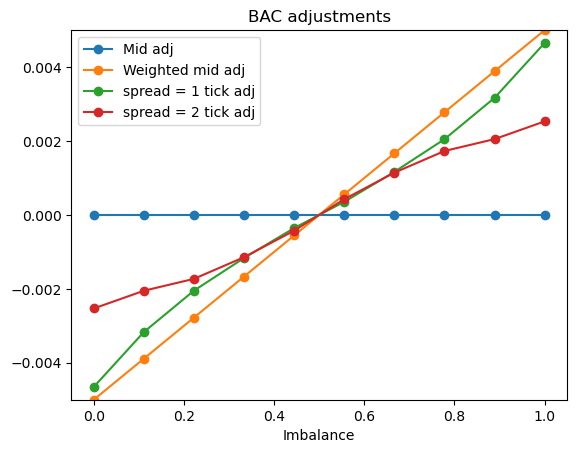

In [59]:
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,R1,R2,K=estimate(T)
G6=plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

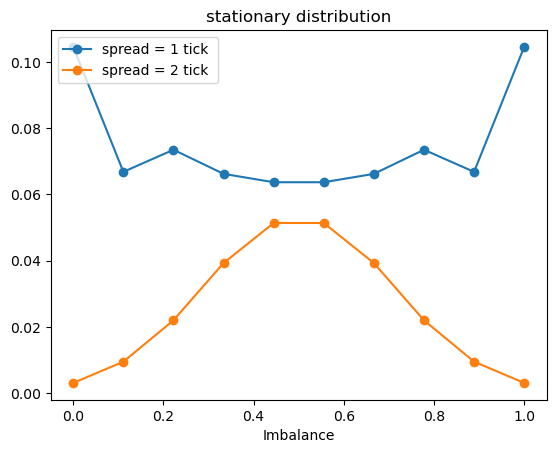

In [60]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick ",marker='o')
    
plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')

# CVX

In [61]:
n_imb=4
n_spread=4
dt=1
data=get_df('CVX')
ticker='CVX'
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,R1,R2,K=estimate(T)

In [62]:
n_imb=4
n_spread=4
dt=1
data=get_df('CVX')
ticker='CVX'
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,R1,R2,K=estimate(T)

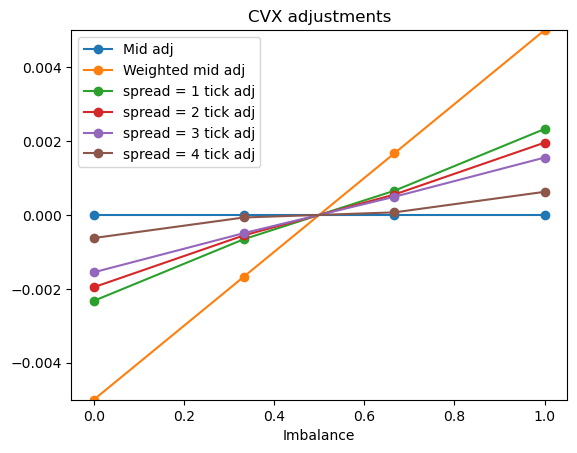

In [63]:
G6=plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

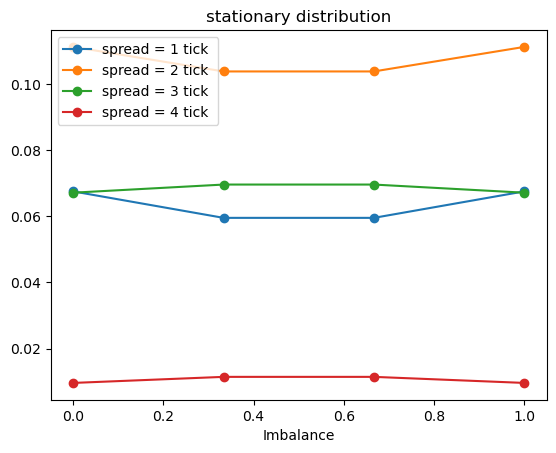

In [64]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick ",marker='o')

plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')

# Summary

1| The micro-price is the expected mid-price in the distant future

<div>&nbsp;</div>

2| In practice, the distant future could be concluded as adequately approximated by $τ^6$ the time of the 6th mid price move

<div>&nbsp;</div>

3| The paper by Sasha Stoikov (linked above) may provide evidence that the micro-price could be a good predictor of future mid prices

<div>&nbsp;</div>

4| Micro-price can fit very different microstructures

<div>&nbsp;</div>

5| Micro-price is horizon independent

<div>&nbsp;</div>

6| Micro-price seems to live between the bid and the ask

<div>&nbsp;</div>



<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

**<center>Just adding some space for the second implementation</center>**

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>


In [111]:
# Load Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [112]:
# Load data

round2dayzero = pd.read_csv('prices_round_2_day_-1.csv', sep = ';')

round2dayone = pd.read_csv('prices_round_2_day_0.csv', sep = ';')

round2daytwo = pd.read_csv('prices_round_2_day_1.csv', sep = ';')

In [113]:
round2dayzero

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
2,-1,0,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
3,-1,0,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
4,-1,100,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1,999800,PEARLS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,-760.0
39996,-1,999900,PINA_COLADAS,15228,102,NaN,NaN,NaN,NaN,15231,102,NaN,NaN,NaN,NaN,15229.5,-483648.0
39997,-1,999900,COCONUTS,8113,178,NaN,NaN,NaN,NaN,8115,76,8116.0,102.0,NaN,NaN,8114.0,-791928.0
39998,-1,999900,BANANAS,4892,31,NaN,NaN,NaN,NaN,4898,31,NaN,NaN,NaN,NaN,4895.0,216680.0


In [114]:
def update_timestamp(df):
    df['timestamp'] = df['day']*100*10000+df['timestamp']
    df.drop(['day'], axis = 1, inplace= True)
    return df

In [115]:
round2dayzero_shift = update_timestamp(round2dayzero)
round2dayone_shift = update_timestamp(round2dayone)
round2daytwo_shift = update_timestamp(round2daytwo)

In [116]:
# merge the three dataframes into one
round2 = pd.concat([round2dayzero_shift, round2dayone_shift, round2daytwo_shift], axis = 0)

In [117]:
round2_pearls = round2[round2['product']=='PEARLS'].copy()
round2_bananas = round2[round2['product']=='BANANAS'].copy()

In [118]:
round2_pearls.head(5)

,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1000000,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
4,-999900,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
11,-999800,PEARLS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,4.0
12,-999700,PEARLS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,4.0
17,-999600,PEARLS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,4.0


In [119]:
def get_df(df):
    df = df[['timestamp', 'product', 'mid_price', 'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1']].copy()
    df['mid_price'] = df['mid_price'].astype(float)
    df['bid_price_1'] = df['bid_price_1'].astype(float)
    df['ask_price_1'] = df['ask_price_1'].astype(float)
    df['bid_volume_1'] = df['bid_volume_1'].astype(float)
    df['ask_volume_1'] = df['ask_volume_1'].astype(float)
    
    df['imb'] = df['bid_volume_1'].astype(float)/(df['bid_volume_1'].astype(float)+df['ask_volume_1'].astype(float))
    df['wmid'] = df['ask_price_1'].astype(float)*df['imb']+df['bid_price_1'].astype(float)*(1-df['imb'])
    df.rename(columns = {'mid_price':'mid', 'bid_price_1':'bid', 'ask_price_1':'ask', 'bid_volume_1':'bs', 'ask_volume_1':'as','timestamp':'time'}, inplace = True)
    return df.reset_index(drop=True)


In [120]:
from scipy.linalg import block_diag

In [121]:
def prep_data_sym(T, n_imb, dt, n_spread):
    spread=T.ask-T.bid
    ticksize=np.round(min(spread.loc[spread>0])*100)/100
    T.spread=T.ask-T.bid
    # adds the spread and mid prices
    T['spread']=np.round((T['ask']-T['bid'])/ticksize)*ticksize
    T['mid']=(T['bid']+T['ask'])/2
    # filter out spreads >= n_spread
    T = T.loc[(T.spread <= n_spread*ticksize) & (T.spread>0)]
    T['imb']=T['bs']/(T['bs']+T['as'])
    # discretize imbalance into percentiles
    T['imb_bucket'] = pd.qcut(T['imb'], n_imb, labels=False)
    T['next_mid']=T['mid'].shift(-dt)
    # step ahead state variables
    T['next_spread']=T['spread'].shift(-dt)
    T['next_time']=T['time'].shift(-dt)
    T['next_imb_bucket']=T['imb_bucket'].shift(-dt)
    # step ahead change in price
    T['dM']=np.round((T['next_mid']-T['mid'])/ticksize*2)*ticksize/2
    T = T.loc[(T.dM <= ticksize*1.1) & (T.dM >= -ticksize*1.1)]
    # symetrize data
    T2 = T.copy(deep=True)
    T2['imb_bucket']=n_imb-1-T2['imb_bucket']
    T2['next_imb_bucket']=n_imb-1-T2['next_imb_bucket']
    T2['dM']=-T2['dM']
    T2['mid']=-T2['mid']
    T3=pd.concat([T,T2])
    T3.index = pd.RangeIndex(len(T3.index))
    return T3,ticksize

In [122]:
T,ticksize = prep_data_sym(round2_bananas, n_imb=10, dt = 1, n_spread = 2)

AttributeError: 'DataFrame' object has no attribute 'ask'

In [123]:
def estimate(T):
    no_move=T[T['dM']==0]
    no_move_counts=no_move.pivot_table(index=[ 'next_imb_bucket'],
                                      columns=['spread', 'imb_bucket'],
                                      values='time',
                                      fill_value=0,
                                      aggfunc='count').unstack()
    Q_counts=np.resize(np.array(no_move_counts[0:(n_imb*n_imb)]),(n_imb,n_imb))
    # Loop over all spreads and add block matrices
    for i in range(1,n_spread):
        Qi=np.resize(np.array(no_move_counts[(i*n_imb*n_imb):(i+1)*(n_imb*n_imb)]),(n_imb,n_imb))
        Q_counts=block_diag(Q_counts,Qi)
    # print Q_counts
    move_counts=T[(T['dM']!=0)].pivot_table(index=['dM'],
                            columns=['spread', 'imb_bucket'],
                            values='time',
                            fill_value=0,
                            aggfunc='count').unstack()
    
    Round_counts=np.resize(np.array(move_counts),(n_imb*n_spread,4))
    T1=np.concatenate((Q_counts,Round_counts),axis=1).astype(float)
    for i in range (0,n_imb*n_spread):
        T1[i]=T1[i]/T1[i].sum()
    Q=T1[:,0:(n_imb*n_spread)]
    Round1=T1[:,(n_imb*n_spread):]
    
    K=np.array([-0.01, -0.005, 0.005, 0.01])
    move_counts=T[(T['dM']!=0)].pivot_table(index=['spread', 'imb_bucket'],
                        columns=['next_spread', 'next_imb_bucket'],
                        values='time',
                        fill_value=0,
                        aggfunc='count') #.unstack()
    
    Round2_counts=np.resize(np.array(move_counts),(n_imb*n_spread,n_imb*n_spread))
    T2=np.concatenate((Q_counts,Round2_counts),axis=1).astype(float)
    
    for i in range(0,n_imb*n_spread):
        T2[i]=T2[i]/T2[i].sum()
    Round2=T2[:,(n_imb*n_spread):]
    Q2=T2[:,0:(n_imb*n_spread)]
    G1=np.dot(np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),Round1),K)
    B=np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),Round2)
    
    return G1,B,Q,Q2,Round1,Round2,K

In [124]:
def plot_Gstar(ticker,G1,B,T):
    G2=np.dot(B,G1)+G1
    G3=G2+np.dot(np.dot(B,B),G1)
    G4=G3+np.dot(np.dot(np.dot(B,B),B),G1)
    G5=G4+np.dot(np.dot(np.dot(np.dot(B,B),B),B),G1)
    G6=G5+np.dot(np.dot(np.dot(np.dot(np.dot(B,B),B),B),B),G1)
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb)*0,label='Mid adj', marker='o')
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb),label='Weighted mid adj',marker='o')
    for i in range(0,n_spread):
        plt.plot(imb,G6[(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick adj",marker='o')
    plt.ylim(-0.005,0.005)
    plt.legend(loc='upper left')
    plt.title(ticker+' adjustments')
    plt.xlabel('Imbalance')
    return G6

In [125]:
n_imb=10
n_spread=2
dt=1
data=get_df(round2_bananas)
ticker='BANANAS'
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)

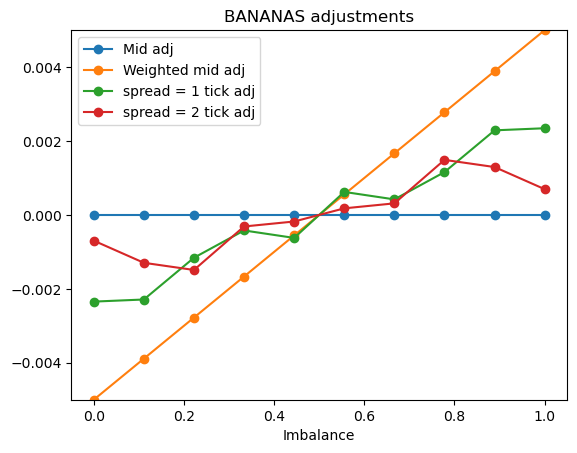

In [126]:
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,Round1,Round2,K=estimate(T)
G6=plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

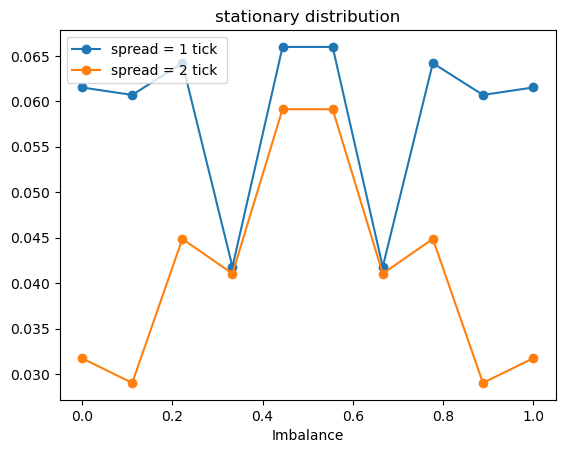

In [127]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick ",marker='o')
    
plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')

In [128]:
G6

array([-0.00234525, -0.00228844, -0.00115853, -0.00042027, -0.00062218,
        0.00062218,  0.00042027,  0.00115853,  0.00228844,  0.00234525,
       -0.00069648, -0.00129538, -0.00148937, -0.00031284, -0.00017806,
        0.00017806,  0.00031284,  0.00148937,  0.00129538,  0.00069648])

In [129]:
n_imb=4
n_spread=4
dt=1
data=get_df(round2_pearls)
ticker='PEARLS'
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,Round1,Round2,K=estimate(T)

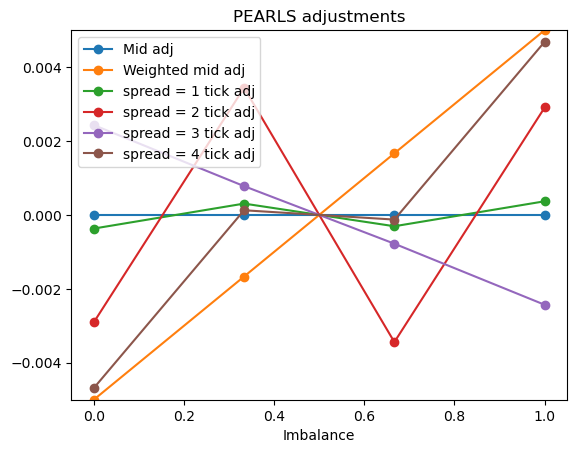

In [130]:
G6 = plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

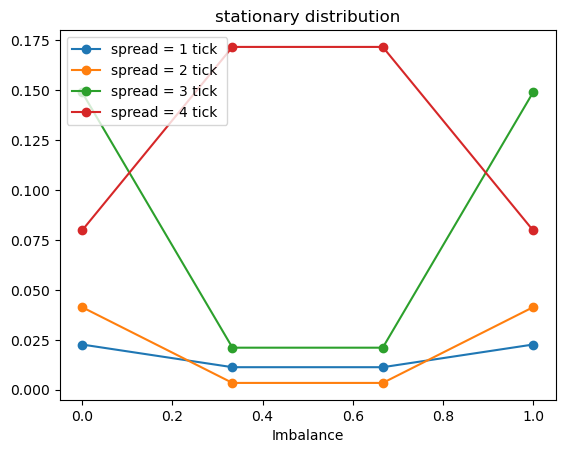

In [131]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)], label="spread = "+str(i+1)+" tick ",marker='o')
    
plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')


<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

**<center>Just adding some space for the third implementation</center>**

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>

<div>&nbsp;</div>
